In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
class AlexNet8(Model):
    def __init__(self):
        super(AlexNet8, self).__init__()
        self.c1 = Conv2D(filters=96, kernel_size=(3, 3))
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.p1 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.c2 = Conv2D(filters=256, kernel_size=(3, 3))
        self.b2 = BatchNormalization()
        self.a2 = Activation('relu')
        self.p2 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.c3 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
                         
        self.c4 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
                         
        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same',
                         activation='relu')
        self.p3 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.flatten = Flatten()
        self.f1 = Dense(2048, activation='relu')
        self.d1 = Dropout(0.5)
        self.f2 = Dense(2048, activation='relu')
        self.d2 = Dropout(0.5)
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p2(x)

        x = self.c3(x)

        x = self.c4(x)

        x = self.c5(x)
        x = self.p3(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d1(x)
        x = self.f2(x)
        x = self.d2(x)
        y = self.f3(x)
        return y

In [4]:
model = AlexNet8()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

In [5]:
checkpoint_save_path = "./checkpoint/AlexNet8.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

-------------load the model-----------------


In [6]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

In [7]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])

Epoch 1/5
1563/1563 [==============================] - 33s 18ms/step - loss: 1.0059 - sparse_categorical_accuracy: 0.6506 - val_loss: 1.0998 - val_sparse_categorical_accuracy: 0.6223
Epoch 2/5
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9664 - sparse_categorical_accuracy: 0.6689 - val_loss: 1.2016 - val_sparse_categorical_accuracy: 0.5969
Epoch 3/5
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9125 - sparse_categorical_accuracy: 0.6867 - val_loss: 1.0573 - val_sparse_categorical_accuracy: 0.6293
Epoch 4/5
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8787 - sparse_categorical_accuracy: 0.7007 - val_loss: 1.2721 - val_sparse_categorical_accuracy: 0.5787
Epoch 5/5
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8467 - sparse_categorical_accuracy: 0.7123 - val_loss: 1.0954 - val_sparse_categorical_accuracy: 0.6251


In [8]:
model.summary()

Model: "alex_net8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  2688      
_________________________________________________________________
batch_normalization (BatchNo multiple                  384       
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  221440    
_________________________________________________________________
batch_normalization_1 (Batch multiple                  1024      
_________________________________________________________________
activation_1 (Activation)    multiple                  0 

In [9]:
# print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

In [10]:
# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

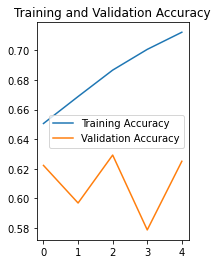

In [11]:
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

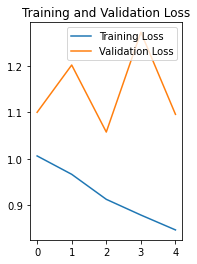

In [12]:
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()